In [1]:
from autometrics.dataset.datasets import HelpSteer
from autometrics.util.analysis import display_top_5_metrics_by_validation, get_top_metric_by_validation, plot_metric_target_scatterplot
from autometrics.evaluate.correlation import calculate_correlation
from autometrics.aggregator.regression import Ridge
from autometrics.generator.LLMJudgeProposer import LLMJudgeProposer
from autometrics.metrics.MetricBank import all_metrics
import dspy
import pandas as pd
pd.set_option('display.max_colwidth', None)

import litellm

litellm.suppress_debug_info = True

/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = HelpSteer()

In [3]:
train, dev, test = dataset.get_splits(train_ratio=0.2, val_ratio=0.3, seed=42, max_size=1000)

In [4]:
llama31_70b = dspy.LM("openai/meta-llama/Meta-Llama-3-70b-Instruct", api_base="http://future-hgx-1:7410/v1", api_key="None")

dspy.settings.configure(lm=llama31_70b)

In [5]:
llama31_70b.model

'openai/meta-llama/Meta-Llama-3-70b-Instruct'

In [6]:
from autometrics.metrics.llm_judge.LLMJudgeOptimized import LLMJudgeOptimized

In [7]:
for target_column in dataset.target_columns:
    new_metric = LLMJudgeOptimized(
        name=target_column + "_" + llama31_70b.model.split('/')[-1], 
        description="Optimized LLM as a judge for " + target_column, 
        model=llama31_70b,
        train_dataset=train,
        task_description="Answer the user query as a helpful chatbot assistant.",
        target_column=target_column,
        output_prompt_path='helpsteer_' + target_column + '_prompt.dspy',
        metric_name=target_column,
    )

    train.add_metrics([new_metric])
    dev.add_metrics([new_metric])
    test.add_metrics([new_metric])


RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  2%|▏         | 8/500 [00:00<00:01, 258.28it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  1%|          | 6/500 [00:00<00:01, 284.62it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 5/19


  0%|          | 2/500 [00:00<00:01, 286.94it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 6/19


  2%|▏         | 8/500 [00:00<00:01, 285.75it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 7/19


  1%|          | 4/500 [00:00<00:01, 258.30it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 8/19


  0%|          | 2/500 [00:00<00:01, 290.70it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 9/19


  0%|          | 2/500 [00:00<00:06, 81.14it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 10/19


  1%|          | 5/500 [00:00<00:01, 256.87it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 11/19


  1%|          | 6/500 [00:00<00:01, 277.24it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 12/19


  1%|          | 5/500 [00:00<00:01, 285.34it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  1%|          | 6/500 [00:00<00:05, 86.58it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 14/19


  1%|          | 4/500 [00:00<00:02, 234.83it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  2%|▏         | 8/500 [00:00<00:01, 353.55it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 16/19


  2%|▏         | 8/500 [00:00<00:01, 325.38it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 17/19


  1%|          | 5/500 [00:00<00:01, 254.99it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 18/19


  0%|          | 1/500 [00:00<00:01, 310.55it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


  1%|          | 5/500 [00:00<00:01, 252.96it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score on this metric.

1: Evaluate the given text based on the provided task description and metric, and return a score within the suggested range. Think step-by-step about how well the text meets the criteria described in the task description, and provide a clear and concise reasoning for your score.

2: You are a helpful chatbot assistant who answers user queries about a reference text. Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score on

Average Metric: 197.1000000000001 / 300  (65.7): 100%|██████████| 300/300 [00:00<00:00, 834.13it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 65.7

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 17.833333333333332 / 25  (71.3): 100%|██████████| 25/25 [00:00<00:00, 400.57it/s]


Score: 71.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [71.33]
Full eval scores so far: [65.7]
Best full score so far: 65.7


== Minibatch Trial 2 / 25 ==


Average Metric: 17.0 / 25  (68.0): 100%|██████████| 25/25 [00:00<00:00, 558.67it/s]              


Score: 68.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [71.33, 68.0]
Full eval scores so far: [65.7]
Best full score so far: 65.7


== Minibatch Trial 3 / 25 ==


Average Metric: 16.666666666666664 / 25  (66.7): 100%|██████████| 25/25 [00:00<00:00, 441.70it/s]


Score: 66.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [71.33, 68.0, 66.67]
Full eval scores so far: [65.7]
Best full score so far: 65.7


== Minibatch Trial 4 / 25 ==


Average Metric: 18.25 / 25  (73.0): 100%|██████████| 25/25 [00:00<00:00, 621.63it/s]            


Score: 73.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0]
Full eval scores so far: [65.7]
Best full score so far: 65.7


== Minibatch Trial 5 / 25 ==


Average Metric: 13.666666666666668 / 25  (54.7): 100%|██████████| 25/25 [00:00<00:00, 449.69it/s]


Score: 54.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67]
Full eval scores so far: [65.7]
Best full score so far: 65.7


== Minibatch Trial 6 / 25 ==


Average Metric: 12.916666666666668 / 25  (51.7): 100%|██████████| 25/25 [00:00<00:00, 421.20it/s]


Score: 51.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67]
Full eval scores so far: [65.7]
Best full score so far: 65.7


== Minibatch Trial 7 / 25 ==


Average Metric: 17.0 / 25  (68.0): 100%|██████████| 25/25 [00:00<00:00, 239.68it/s]             


Score: 68.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0]
Full eval scores so far: [65.7]
Best full score so far: 65.7


== Minibatch Trial 8 / 25 ==


Average Metric: 14.616666666666669 / 25  (58.5): 100%|██████████| 25/25 [00:00<00:00, 340.77it/s]


Score: 58.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47]
Full eval scores so far: [65.7]
Best full score so far: 65.7


== Minibatch Trial 9 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 423.02it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33]
Full eval scores so far: [65.7]
Best full score so far: 65.7


== Minibatch Trial 10 / 25 ==


Average Metric: 15.95 / 25  (63.8): 100%|██████████| 25/25 [00:00<00:00, 449.03it/s]            


Score: 63.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8]
Full eval scores so far: [65.7]
Best full score so far: 65.7


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 73.0) from minibatch trials...


Average Metric: 184.86666666666673 / 300  (61.6): 100%|██████████| 300/300 [00:00<00:00, 507.69it/s]


Full eval scores so far: [65.7, 61.62]
Best full score so far: 65.7


== Minibatch Trial 11 / 25 ==


Average Metric: 17.25 / 25  (69.0): 100%|██████████| 25/25 [00:00<00:00, 407.83it/s]             


Score: 69.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0]
Full eval scores so far: [65.7, 61.62]
Best full score so far: 65.7


== Minibatch Trial 12 / 25 ==


Average Metric: 15.333333333333336 / 25  (61.3): 100%|██████████| 25/25 [00:00<00:00, 4213.69it/s]


Score: 61.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33]
Full eval scores so far: [65.7, 61.62]
Best full score so far: 65.7


== Minibatch Trial 13 / 25 ==


Average Metric: 14.366666666666667 / 25  (57.5): 100%|██████████| 25/25 [00:00<00:00, 437.53it/s]


Score: 57.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47]
Full eval scores so far: [65.7, 61.62]
Best full score so far: 65.7


== Minibatch Trial 14 / 25 ==


Average Metric: 16.833333333333336 / 25  (67.3): 100%|██████████| 25/25 [00:00<00:00, 533.74it/s]


Score: 67.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 11'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33]
Full eval scores so far: [65.7, 61.62]
Best full score so far: 65.7


== Minibatch Trial 15 / 25 ==


Average Metric: 17.333333333333332 / 25  (69.3): 100%|██████████| 25/25 [00:00<00:00, 5173.81it/s]


Score: 69.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33, 69.33]
Full eval scores so far: [65.7, 61.62]
Best full score so far: 65.7


== Minibatch Trial 16 / 25 ==


Average Metric: 17.166666666666664 / 25  (68.7): 100%|██████████| 25/25 [00:00<00:00, 269.93it/s]


Score: 68.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33, 69.33, 68.67]
Full eval scores so far: [65.7, 61.62]
Best full score so far: 65.7


== Minibatch Trial 17 / 25 ==


Average Metric: 16.166666666666664 / 25  (64.7): 100%|██████████| 25/25 [00:00<00:00, 481.68it/s]


Score: 64.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 16'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33, 69.33, 68.67, 64.67]
Full eval scores so far: [65.7, 61.62]
Best full score so far: 65.7


== Minibatch Trial 18 / 25 ==


Average Metric: 17.75 / 25  (71.0): 100%|██████████| 25/25 [00:00<00:00, 404.57it/s]             


Score: 71.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33, 69.33, 68.67, 64.67, 71.0]
Full eval scores so far: [65.7, 61.62]
Best full score so far: 65.7


== Minibatch Trial 19 / 25 ==


Average Metric: 17.916666666666664 / 25  (71.7): 100%|██████████| 25/25 [00:00<00:00, 388.10it/s]


Score: 71.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33, 69.33, 68.67, 64.67, 71.0, 71.67]
Full eval scores so far: [65.7, 61.62]
Best full score so far: 65.7


== Minibatch Trial 20 / 25 ==


Average Metric: 18.15 / 25  (72.6): 100%|██████████| 25/25 [00:00<00:00, 335.38it/s]             


Score: 72.6 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33, 69.33, 68.67, 64.67, 71.0, 71.67, 72.6]
Full eval scores so far: [65.7, 61.62]
Best full score so far: 65.7


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 72.6) from minibatch trials...


Average Metric: 186.61666666666673 / 300  (62.2): 100%|██████████| 300/300 [00:00<00:00, 538.84it/s]


Full eval scores so far: [65.7, 61.62, 62.21]
Best full score so far: 65.7


== Minibatch Trial 21 / 25 ==


Average Metric: 18.25 / 25  (73.0): 100%|██████████| 25/25 [00:00<00:00, 607.27it/s]


Score: 73.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 16', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33, 69.33, 68.67, 64.67, 71.0, 71.67, 72.6, 73.0]
Full eval scores so far: [65.7, 61.62, 62.21]
Best full score so far: 65.7


== Minibatch Trial 22 / 25 ==


Average Metric: 18.0 / 25  (72.0): 100%|██████████| 25/25 [00:00<00:00, 422.58it/s]              


Score: 72.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 16', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33, 69.33, 68.67, 64.67, 71.0, 71.67, 72.6, 73.0, 72.0]
Full eval scores so far: [65.7, 61.62, 62.21]
Best full score so far: 65.7


== Minibatch Trial 23 / 25 ==


Average Metric: 15.416666666666668 / 25  (61.7): 100%|██████████| 25/25 [00:00<00:00, 406.52it/s]


Score: 61.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 9'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33, 69.33, 68.67, 64.67, 71.0, 71.67, 72.6, 73.0, 72.0, 61.67]
Full eval scores so far: [65.7, 61.62, 62.21]
Best full score so far: 65.7


== Minibatch Trial 24 / 25 ==


Average Metric: 15.25 / 25  (61.0): 100%|██████████| 25/25 [00:00<00:00, 374.32it/s]            


Score: 61.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 16', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33, 69.33, 68.67, 64.67, 71.0, 71.67, 72.6, 73.0, 72.0, 61.67, 61.0]
Full eval scores so far: [65.7, 61.62, 62.21]
Best full score so far: 65.7


== Minibatch Trial 25 / 25 ==


Average Metric: 15.91666666666667 / 25  (63.7): 100%|██████████| 25/25 [00:00<00:00, 468.90it/s] 


Score: 63.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [71.33, 68.0, 66.67, 73.0, 54.67, 51.67, 68.0, 58.47, 65.33, 63.8, 69.0, 61.33, 57.47, 67.33, 69.33, 68.67, 64.67, 71.0, 71.67, 72.6, 73.0, 72.0, 61.67, 61.0, 63.67]
Full eval scores so far: [65.7, 61.62, 62.21]
Best full score so far: 65.7


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 72.0) from minibatch trials...


Average Metric: 199.3666666666668 / 300  (66.5): 100%|██████████| 300/300 [00:00<00:00, 509.79it/s]


New best full eval score! Score: 66.46
Full eval scores so far: [65.7, 61.62, 62.21, 66.46]
Best full score so far: 66.46


Returning best identified program with score 66.46!


Grading rows: 100%|██████████| 1789/1789 [00:05<00:00, 327.88row/s]



RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  2%|▏         | 8/500 [00:00<00:01, 316.57it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  1%|          | 6/500 [00:00<00:02, 193.59it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 5/19


  0%|          | 2/500 [00:00<00:01, 302.81it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 6/19


  2%|▏         | 8/500 [00:00<00:01, 301.71it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 7/19


  1%|          | 4/500 [00:00<00:01, 283.81it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 8/19


  0%|          | 2/500 [00:00<00:01, 257.36it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 9/19


  0%|          | 2/500 [00:00<00:13, 36.51it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 10/19


  1%|          | 5/500 [00:00<00:01, 274.06it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 11/19


  1%|          | 6/500 [00:00<00:01, 276.27it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 12/19


  1%|          | 5/500 [00:00<00:01, 301.55it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  1%|          | 6/500 [00:00<00:01, 303.78it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 14/19


  1%|          | 4/500 [00:00<00:01, 259.05it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  2%|▏         | 8/500 [00:00<00:01, 318.28it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 16/19


  2%|▏         | 8/500 [00:00<00:01, 330.40it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 17/19


  1%|          | 5/500 [00:00<00:04, 115.67it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 18/19


  0%|          | 1/500 [00:00<00:01, 308.93it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


  1%|          | 5/500 [00:00<00:01, 279.94it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score on this metric.

1: Evaluate the input text based on the provided task description and metric, and return a score within the suggested range. Provide a step-by-step reasoning for the score, considering the nuances of language and contextual relationships in the text.

2: You are a critical thinking expert who evaluates the performance of language models on various tasks. Given an input text, a task description that the model was trying to follow, and a metric to rate the text on, return a score on this metric, 

Average Metric: 201.91666666666677 / 300  (67.3): 100%|██████████| 300/300 [00:00<00:00, 677.14it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 67.31

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 15.666666666666668 / 25  (62.7): 100%|██████████| 25/25 [00:00<00:00, 221.58it/s]


Score: 62.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [62.67]
Full eval scores so far: [67.31]
Best full score so far: 67.31


== Minibatch Trial 2 / 25 ==


Average Metric: 18.166666666666664 / 25  (72.7): 100%|██████████| 25/25 [00:00<00:00, 722.21it/s]


Score: 72.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [62.67, 72.67]
Full eval scores so far: [67.31]
Best full score so far: 67.31


== Minibatch Trial 3 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 433.13it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [62.67, 72.67, 65.33]
Full eval scores so far: [67.31]
Best full score so far: 67.31


== Minibatch Trial 4 / 25 ==


Average Metric: 15.750000000000002 / 25  (63.0): 100%|██████████| 25/25 [00:00<00:00, 426.64it/s]


Score: 63.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0]
Full eval scores so far: [67.31]
Best full score so far: 67.31


== Minibatch Trial 5 / 25 ==


Average Metric: 14.916666666666668 / 25  (59.7): 100%|██████████| 25/25 [00:00<00:00, 405.90it/s]


Score: 59.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67]
Full eval scores so far: [67.31]
Best full score so far: 67.31


== Minibatch Trial 6 / 25 ==


Average Metric: 12.75 / 25  (51.0): 100%|██████████| 25/25 [00:00<00:00, 390.40it/s]             


Score: 51.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0]
Full eval scores so far: [67.31]
Best full score so far: 67.31


== Minibatch Trial 7 / 25 ==


Average Metric: 16.75 / 25  (67.0): 100%|██████████| 25/25 [00:00<00:00, 4162.50it/s]             


Score: 67.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0]
Full eval scores so far: [67.31]
Best full score so far: 67.31


== Minibatch Trial 8 / 25 ==


Average Metric: 17.7 / 25  (70.8): 100%|██████████| 25/25 [00:00<00:00, 406.36it/s]              


Score: 70.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8]
Full eval scores so far: [67.31]
Best full score so far: 67.31


== Minibatch Trial 9 / 25 ==


Average Metric: 14.5 / 25  (58.0): 100%|██████████| 25/25 [00:00<00:00, 414.07it/s]              


Score: 58.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0]
Full eval scores so far: [67.31]
Best full score so far: 67.31


== Minibatch Trial 10 / 25 ==


Average Metric: 16.783333333333335 / 25  (67.1): 100%|██████████| 25/25 [00:00<00:00, 421.91it/s]


Score: 67.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13]
Full eval scores so far: [67.31]
Best full score so far: 67.31


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 72.67) from minibatch trials...


Average Metric: 204.06666666666683 / 300  (68.0): 100%|██████████| 300/300 [00:00<00:00, 530.92it/s]


New best full eval score! Score: 68.02
Full eval scores so far: [67.31, 68.02]
Best full score so far: 68.02


== Minibatch Trial 11 / 25 ==


Average Metric: 18.583333333333332 / 25  (74.3): 100%|██████████| 25/25 [00:00<00:00, 403.53it/s]


Score: 74.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33]
Full eval scores so far: [67.31, 68.02]
Best full score so far: 68.02


== Minibatch Trial 12 / 25 ==


Average Metric: 17.166666666666664 / 25  (68.7): 100%|██████████| 25/25 [00:00<00:00, 398.48it/s]


Score: 68.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67]
Full eval scores so far: [67.31, 68.02]
Best full score so far: 68.02


== Minibatch Trial 13 / 25 ==


Average Metric: 14.533333333333333 / 25  (58.1): 100%|██████████| 25/25 [00:00<00:00, 486.89it/s]


Score: 58.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 0', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13]
Full eval scores so far: [67.31, 68.02]
Best full score so far: 68.02


== Minibatch Trial 14 / 25 ==


Average Metric: 16.5 / 25  (66.0): 100%|██████████| 25/25 [00:00<00:00, 399.53it/s]              


Score: 66.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0]
Full eval scores so far: [67.31, 68.02]
Best full score so far: 68.02


== Minibatch Trial 15 / 25 ==


Average Metric: 17.666666666666664 / 25  (70.7): 100%|██████████| 25/25 [00:00<00:00, 408.34it/s]


Score: 70.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 14'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0, 70.67]
Full eval scores so far: [67.31, 68.02]
Best full score so far: 68.02


== Minibatch Trial 16 / 25 ==


Average Metric: 15.500000000000002 / 25  (62.0): 100%|██████████| 25/25 [00:00<00:00, 5545.67it/s]


Score: 62.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0, 70.67, 62.0]
Full eval scores so far: [67.31, 68.02]
Best full score so far: 68.02


== Minibatch Trial 17 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 528.92it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0, 70.67, 62.0, 65.33]
Full eval scores so far: [67.31, 68.02]
Best full score so far: 68.02


== Minibatch Trial 18 / 25 ==


Average Metric: 15.416666666666668 / 25  (61.7): 100%|██████████| 25/25 [00:00<00:00, 458.29it/s]


Score: 61.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0, 70.67, 62.0, 65.33, 61.67]
Full eval scores so far: [67.31, 68.02]
Best full score so far: 68.02


== Minibatch Trial 19 / 25 ==


Average Metric: 16.916666666666668 / 25  (67.7): 100%|██████████| 25/25 [00:00<00:00, 224.15it/s]


Score: 67.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 18', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0, 70.67, 62.0, 65.33, 61.67, 67.67]
Full eval scores so far: [67.31, 68.02]
Best full score so far: 68.02


== Minibatch Trial 20 / 25 ==


Average Metric: 14.166666666666666 / 25  (56.7): 100%|██████████| 25/25 [00:00<00:00, 431.24it/s]


Score: 56.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 16'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0, 70.67, 62.0, 65.33, 61.67, 67.67, 56.67]
Full eval scores so far: [67.31, 68.02]
Best full score so far: 68.02


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 71.5) from minibatch trials...


Average Metric: 205.73333333333346 / 300  (68.6): 100%|██████████| 300/300 [00:00<00:00, 479.59it/s]


New best full eval score! Score: 68.58
Full eval scores so far: [67.31, 68.02, 68.58]
Best full score so far: 68.58


== Minibatch Trial 21 / 25 ==


Average Metric: 18.666666666666668 / 25  (74.7): 100%|██████████| 25/25 [00:00<00:00, 420.77it/s]


Score: 74.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0, 70.67, 62.0, 65.33, 61.67, 67.67, 56.67, 74.67]
Full eval scores so far: [67.31, 68.02, 68.58]
Best full score so far: 68.58


== Minibatch Trial 22 / 25 ==


Average Metric: 17.333333333333332 / 25  (69.3): 100%|██████████| 25/25 [00:00<00:00, 366.19it/s]


Score: 69.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 0', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0, 70.67, 62.0, 65.33, 61.67, 67.67, 56.67, 74.67, 69.33]
Full eval scores so far: [67.31, 68.02, 68.58]
Best full score so far: 68.58


== Minibatch Trial 23 / 25 ==


Average Metric: 14.700000000000001 / 25  (58.8): 100%|██████████| 25/25 [00:00<00:00, 452.24it/s]


Score: 58.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0, 70.67, 62.0, 65.33, 61.67, 67.67, 56.67, 74.67, 69.33, 58.8]
Full eval scores so far: [67.31, 68.02, 68.58]
Best full score so far: 68.58


== Minibatch Trial 24 / 25 ==


Average Metric: 17.416666666666664 / 25  (69.7): 100%|██████████| 25/25 [00:00<00:00, 410.35it/s]


Score: 69.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 9'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0, 70.67, 62.0, 65.33, 61.67, 67.67, 56.67, 74.67, 69.33, 58.8, 69.67]
Full eval scores so far: [67.31, 68.02, 68.58]
Best full score so far: 68.58


== Minibatch Trial 25 / 25 ==


Average Metric: 18.333333333333332 / 25  (73.3): 100%|██████████| 25/25 [00:00<00:00, 437.67it/s]


Score: 73.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [62.67, 72.67, 65.33, 63.0, 59.67, 51.0, 67.0, 70.8, 58.0, 67.13, 74.33, 68.67, 58.13, 66.0, 70.67, 62.0, 65.33, 61.67, 67.67, 56.67, 74.67, 69.33, 58.8, 69.67, 73.33]
Full eval scores so far: [67.31, 68.02, 68.58]
Best full score so far: 68.58


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 74.67) from minibatch trials...


Average Metric: 201.85000000000016 / 300  (67.3): 100%|██████████| 300/300 [00:00<00:00, 459.01it/s]


Full eval scores so far: [67.31, 68.02, 68.58, 67.28]
Best full score so far: 68.58


Returning best identified program with score 68.58!


Grading rows: 100%|██████████| 1789/1789 [00:05<00:00, 323.17row/s]



RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  2%|▏         | 8/500 [00:00<00:01, 312.24it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  1%|          | 6/500 [00:00<00:01, 284.72it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 5/19


  0%|          | 2/500 [00:00<00:01, 292.91it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 6/19


  2%|▏         | 8/500 [00:00<00:01, 295.01it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 7/19


  1%|          | 4/500 [00:00<00:01, 303.99it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 8/19


  0%|          | 2/500 [00:00<00:01, 300.53it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 9/19


  0%|          | 2/500 [00:00<00:02, 242.90it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 10/19


  1%|          | 5/500 [00:00<00:01, 286.19it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 11/19


  1%|          | 6/500 [00:00<00:01, 308.25it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 12/19


  1%|          | 5/500 [00:00<00:01, 310.42it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  1%|          | 6/500 [00:00<00:02, 189.49it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 14/19


  1%|          | 4/500 [00:00<00:01, 251.40it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  2%|▏         | 8/500 [00:00<00:01, 334.64it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 16/19


  2%|▏         | 8/500 [00:00<00:01, 335.46it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 17/19


  1%|          | 5/500 [00:00<00:02, 236.80it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 18/19


  0%|          | 1/500 [00:00<00:01, 295.58it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


  1%|          | 5/500 [00:00<00:02, 226.16it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score on this metric.

1: Given a text and a task description, along with a specific metric and its suggested range, evaluate the text based on the metric and provide a score within the suggested range. Include a step-by-step reasoning for the score.

2: You are a helpful AI assistant who evaluates the coherence of text based on a specific task description and metric. Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score on this metric. Provide

Average Metric: 221.36666666666665 / 300  (73.8): 100%|██████████| 300/300 [00:00<00:00, 656.56it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 73.79

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 16.583333333333332 / 25  (66.3): 100%|██████████| 25/25 [00:00<00:00, 437.62it/s]


Score: 66.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [66.33]
Full eval scores so far: [73.79]
Best full score so far: 73.79


== Minibatch Trial 2 / 25 ==


Average Metric: 18.333333333333332 / 25  (73.3): 100%|██████████| 25/25 [00:00<00:00, 610.68it/s]


Score: 73.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [66.33, 73.33]
Full eval scores so far: [73.79]
Best full score so far: 73.79


== Minibatch Trial 3 / 25 ==


Average Metric: 16.033333333333335 / 25  (64.1): 100%|██████████| 25/25 [00:00<00:00, 410.67it/s]


Score: 64.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [66.33, 73.33, 64.13]
Full eval scores so far: [73.79]
Best full score so far: 73.79


== Minibatch Trial 4 / 25 ==


Average Metric: 15.233333333333334 / 25  (60.9): 100%|██████████| 25/25 [00:00<00:00, 408.41it/s]


Score: 60.93 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93]
Full eval scores so far: [73.79]
Best full score so far: 73.79


== Minibatch Trial 5 / 25 ==


Average Metric: 14.700000000000001 / 25  (58.8): 100%|██████████| 25/25 [00:00<00:00, 412.22it/s]


Score: 58.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8]
Full eval scores so far: [73.79]
Best full score so far: 73.79


== Minibatch Trial 6 / 25 ==


Average Metric: 13.283333333333333 / 25  (53.1): 100%|██████████| 25/25 [00:00<00:00, 406.43it/s]


Score: 53.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13]
Full eval scores so far: [73.79]
Best full score so far: 73.79


== Minibatch Trial 7 / 25 ==


Average Metric: 17.833333333333332 / 25  (71.3): 100%|██████████| 25/25 [00:00<00:00, 242.68it/s]


Score: 71.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33]
Full eval scores so far: [73.79]
Best full score so far: 73.79


== Minibatch Trial 8 / 25 ==


Average Metric: 18.7 / 25  (74.8): 100%|██████████| 25/25 [00:00<00:00, 318.04it/s]              


Score: 74.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8]
Full eval scores so far: [73.79]
Best full score so far: 73.79


== Minibatch Trial 9 / 25 ==


Average Metric: 18.700000000000003 / 25  (74.8): 100%|██████████| 25/25 [00:00<00:00, 383.11it/s]


Score: 74.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8]
Full eval scores so far: [73.79]
Best full score so far: 73.79


== Minibatch Trial 10 / 25 ==


Average Metric: 17.7 / 25  (70.8): 100%|██████████| 25/25 [00:00<00:00, 436.93it/s]             


Score: 70.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8]
Full eval scores so far: [73.79]
Best full score so far: 73.79


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 74.8) from minibatch trials...


Average Metric: 208.10000000000014 / 300  (69.4): 100%|██████████| 300/300 [00:00<00:00, 442.89it/s]


Full eval scores so far: [73.79, 69.37]
Best full score so far: 73.79


== Minibatch Trial 11 / 25 ==


Average Metric: 16.533333333333335 / 25  (66.1): 100%|██████████| 25/25 [00:00<00:00, 575.00it/s]


Score: 66.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13]
Full eval scores so far: [73.79, 69.37]
Best full score so far: 73.79


== Minibatch Trial 12 / 25 ==


Average Metric: 18.25 / 25  (73.0): 100%|██████████| 25/25 [00:00<00:00, 390.30it/s]


Score: 73.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 0', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0]
Full eval scores so far: [73.79, 69.37]
Best full score so far: 73.79


== Minibatch Trial 13 / 25 ==


Average Metric: 15.899999999999999 / 25  (63.6): 100%|██████████| 25/25 [00:00<00:00, 460.43it/s]


Score: 63.6 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6]
Full eval scores so far: [73.79, 69.37]
Best full score so far: 73.79


== Minibatch Trial 14 / 25 ==


Average Metric: 19.166666666666664 / 25  (76.7): 100%|██████████| 25/25 [00:00<00:00, 5320.02it/s]


Score: 76.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67]
Full eval scores so far: [73.79, 69.37]
Best full score so far: 73.79


== Minibatch Trial 15 / 25 ==


Average Metric: 20.333333333333332 / 25  (81.3): 100%|██████████| 25/25 [00:00<00:00, 4916.43it/s]


Score: 81.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67, 81.33]
Full eval scores so far: [73.79, 69.37]
Best full score so far: 73.79


== Minibatch Trial 16 / 25 ==


Average Metric: 17.999999999999996 / 25  (72.0): 100%|██████████| 25/25 [00:00<00:00, 408.40it/s]


Score: 72.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67, 81.33, 72.0]
Full eval scores so far: [73.79, 69.37]
Best full score so far: 73.79


== Minibatch Trial 17 / 25 ==


Average Metric: 14.66666666666667 / 25  (58.7): 100%|██████████| 25/25 [00:00<00:00, 411.89it/s] 


Score: 58.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67, 81.33, 72.0, 58.67]
Full eval scores so far: [73.79, 69.37]
Best full score so far: 73.79


== Minibatch Trial 18 / 25 ==


Average Metric: 15.95 / 25  (63.8): 100%|██████████| 25/25 [00:00<00:00, 256.44it/s]             


Score: 63.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67, 81.33, 72.0, 58.67, 63.8]
Full eval scores so far: [73.79, 69.37]
Best full score so far: 73.79


== Minibatch Trial 19 / 25 ==


Average Metric: 16.999999999999996 / 25  (68.0): 100%|██████████| 25/25 [00:00<00:00, 443.43it/s]


Score: 68.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67, 81.33, 72.0, 58.67, 63.8, 68.0]
Full eval scores so far: [73.79, 69.37]
Best full score so far: 73.79


== Minibatch Trial 20 / 25 ==


Average Metric: 17.166666666666668 / 25  (68.7): 100%|██████████| 25/25 [00:00<00:00, 428.32it/s]

Score: 68.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 9'].


Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67, 81.33, 72.0, 58.67, 63.8, 68.0, 68.67]
Full eval scores so far: [73.79, 69.37]
Best full score so far: 73.79


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 73.33) from minibatch trials...


Average Metric: 216.26666666666677 / 300  (72.1): 100%|██████████| 300/300 [00:00<00:00, 422.88it/s]


Full eval scores so far: [73.79, 69.37, 72.09]
Best full score so far: 73.79


== Minibatch Trial 21 / 25 ==


Average Metric: 16.75 / 25  (67.0): 100%|██████████| 25/25 [00:00<00:00, 395.00it/s]


Score: 67.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67, 81.33, 72.0, 58.67, 63.8, 68.0, 68.67, 67.0]
Full eval scores so far: [73.79, 69.37, 72.09]
Best full score so far: 73.79


== Minibatch Trial 22 / 25 ==


Average Metric: 18.083333333333336 / 25  (72.3): 100%|██████████| 25/25 [00:00<00:00, 5033.00it/s]


Score: 72.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67, 81.33, 72.0, 58.67, 63.8, 68.0, 68.67, 67.0, 72.33]
Full eval scores so far: [73.79, 69.37, 72.09]
Best full score so far: 73.79


== Minibatch Trial 23 / 25 ==


Average Metric: 15.583333333333332 / 25  (62.3): 100%|██████████| 25/25 [00:00<00:00, 462.92it/s]


Score: 62.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67, 81.33, 72.0, 58.67, 63.8, 68.0, 68.67, 67.0, 72.33, 62.33]
Full eval scores so far: [73.79, 69.37, 72.09]
Best full score so far: 73.79


== Minibatch Trial 24 / 25 ==


Average Metric: 17.53333333333333 / 25  (70.1): 100%|██████████| 25/25 [00:00<00:00, 351.02it/s] 


Score: 70.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 16'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67, 81.33, 72.0, 58.67, 63.8, 68.0, 68.67, 67.0, 72.33, 62.33, 70.13]
Full eval scores so far: [73.79, 69.37, 72.09]
Best full score so far: 73.79


== Minibatch Trial 25 / 25 ==


Average Metric: 18.166666666666664 / 25  (72.7): 100%|██████████| 25/25 [00:00<00:00, 518.08it/s]


Score: 72.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [66.33, 73.33, 64.13, 60.93, 58.8, 53.13, 71.33, 74.8, 74.8, 70.8, 66.13, 73.0, 63.6, 76.67, 81.33, 72.0, 58.67, 63.8, 68.0, 68.67, 67.0, 72.33, 62.33, 70.13, 72.67]
Full eval scores so far: [73.79, 69.37, 72.09]
Best full score so far: 73.79


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 73.0) from minibatch trials...


Average Metric: 209.8000000000001 / 300  (69.9): 100%|██████████| 300/300 [00:00<00:00, 495.16it/s] 


Full eval scores so far: [73.79, 69.37, 72.09, 69.93]
Best full score so far: 73.79


Returning best identified program with score 73.79!


Grading rows: 100%|██████████| 1789/1789 [00:03<00:00, 577.41row/s] 



RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  2%|▏         | 8/500 [00:00<00:01, 307.13it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  1%|          | 6/500 [00:00<00:02, 180.25it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 5/19


  0%|          | 2/500 [00:00<00:01, 265.50it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 6/19


  2%|▏         | 8/500 [00:00<00:01, 289.30it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 7/19


  1%|          | 4/500 [00:00<00:01, 272.46it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 8/19


  0%|          | 2/500 [00:00<00:01, 253.96it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 9/19


  0%|          | 2/500 [00:00<00:12, 39.22it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 10/19


  1%|          | 5/500 [00:00<00:01, 258.36it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 11/19


  1%|          | 6/500 [00:00<00:01, 289.92it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 12/19


  1%|          | 5/500 [00:00<00:01, 261.98it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  1%|          | 6/500 [00:00<00:01, 289.71it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 14/19


  1%|          | 4/500 [00:00<00:02, 234.45it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  2%|▏         | 8/500 [00:00<00:01, 316.48it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 16/19


  2%|▏         | 8/500 [00:00<00:01, 314.37it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 17/19


  1%|          | 5/500 [00:00<00:01, 280.68it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 18/19


  0%|          | 1/500 [00:00<00:01, 267.44it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


  1%|          | 5/500 [00:00<00:01, 263.13it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score on this metric.

1: Evaluate the given text based on the provided task description and metric, and return a score within the suggested range. Provide a step-by-step reasoning for your score.

2: You are a helpful chatbot assistant who is tasked with evaluating the performance of a language model in responding to user queries. Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score on this metric. Think step by step about how well the model'

Average Metric: 178.9833333333335 / 300  (59.7): 100%|██████████| 300/300 [00:00<00:00, 752.32it/s] 
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 59.66

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 16.166666666666664 / 25  (64.7): 100%|██████████| 25/25 [00:00<00:00, 559.36it/s]


Score: 64.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [64.67]
Full eval scores so far: [59.66]
Best full score so far: 59.66


== Minibatch Trial 2 / 25 ==


Average Metric: 16.75 / 25  (67.0): 100%|██████████| 25/25 [00:00<00:00, 408.91it/s]           


Score: 67.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [64.67, 67.0]
Full eval scores so far: [59.66]
Best full score so far: 59.66


== Minibatch Trial 3 / 25 ==


Average Metric: 13.333333333333334 / 25  (53.3): 100%|██████████| 25/25 [00:00<00:00, 407.28it/s]


Score: 53.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [64.67, 67.0, 53.33]
Full eval scores so far: [59.66]
Best full score so far: 59.66


== Minibatch Trial 4 / 25 ==


Average Metric: 18.333333333333336 / 25  (73.3): 100%|██████████| 25/25 [00:00<00:00, 380.80it/s]


Score: 73.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33]
Full eval scores so far: [59.66]
Best full score so far: 59.66


== Minibatch Trial 5 / 25 ==


Average Metric: 13.450000000000001 / 25  (53.8): 100%|██████████| 25/25 [00:00<00:00, 448.49it/s]


Score: 53.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8]
Full eval scores so far: [59.66]
Best full score so far: 59.66


== Minibatch Trial 6 / 25 ==


Average Metric: 16.833333333333336 / 25  (67.3): 100%|██████████| 25/25 [00:00<00:00, 2713.85it/s]


Score: 67.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33]
Full eval scores so far: [59.66]
Best full score so far: 59.66


== Minibatch Trial 7 / 25 ==


Average Metric: 16.75 / 25  (67.0): 100%|██████████| 25/25 [00:00<00:00, 368.81it/s]             


Score: 67.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0]
Full eval scores so far: [59.66]
Best full score so far: 59.66


== Minibatch Trial 8 / 25 ==


Average Metric: 18.333333333333332 / 25  (73.3): 100%|██████████| 25/25 [00:00<00:00, 423.17it/s]


Score: 73.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33]
Full eval scores so far: [59.66]
Best full score so far: 59.66


== Minibatch Trial 9 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:00<00:00, 418.50it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33]
Full eval scores so far: [59.66]
Best full score so far: 59.66


== Minibatch Trial 10 / 25 ==


Average Metric: 17.583333333333332 / 25  (70.3): 100%|██████████| 25/25 [00:00<00:00, 232.56it/s]


Score: 70.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33]
Full eval scores so far: [59.66]
Best full score so far: 59.66


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 73.33) from minibatch trials...


Average Metric: 197.9500000000001 / 300  (66.0): 100%|██████████| 300/300 [00:00<00:00, 496.42it/s] 


New best full eval score! Score: 65.98
Full eval scores so far: [59.66, 65.98]
Best full score so far: 65.98


== Minibatch Trial 11 / 25 ==


Average Metric: 17.0 / 25  (68.0): 100%|██████████| 25/25 [00:00<00:00, 505.14it/s]


Score: 68.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0]
Full eval scores so far: [59.66, 65.98]
Best full score so far: 65.98


== Minibatch Trial 12 / 25 ==


Average Metric: 15.0 / 25  (60.0): 100%|██████████| 25/25 [00:00<00:00, 5090.42it/s]              


Score: 60.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0]
Full eval scores so far: [59.66, 65.98]
Best full score so far: 65.98


== Minibatch Trial 13 / 25 ==


Average Metric: 17.75 / 25  (71.0): 100%|██████████| 25/25 [00:00<00:00, 430.80it/s]


Score: 71.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 4', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0]
Full eval scores so far: [59.66, 65.98]
Best full score so far: 65.98


== Minibatch Trial 14 / 25 ==


Average Metric: 18.166666666666668 / 25  (72.7): 100%|██████████| 25/25 [00:00<00:00, 490.81it/s]


Score: 72.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67]
Full eval scores so far: [59.66, 65.98]
Best full score so far: 65.98


== Minibatch Trial 15 / 25 ==


Average Metric: 13.666666666666668 / 25  (54.7): 100%|██████████| 25/25 [00:00<00:00, 239.96it/s]


Score: 54.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67, 54.67]
Full eval scores so far: [59.66, 65.98]
Best full score so far: 65.98


== Minibatch Trial 16 / 25 ==


Average Metric: 16.033333333333335 / 25  (64.1): 100%|██████████| 25/25 [00:00<00:00, 415.90it/s]


Score: 64.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 3'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67, 54.67, 64.13]
Full eval scores so far: [59.66, 65.98]
Best full score so far: 65.98


== Minibatch Trial 17 / 25 ==


Average Metric: 17.833333333333336 / 25  (71.3): 100%|██████████| 25/25 [00:00<00:00, 1292.34it/s]


Score: 71.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67, 54.67, 64.13, 71.33]
Full eval scores so far: [59.66, 65.98]
Best full score so far: 65.98


== Minibatch Trial 18 / 25 ==


Average Metric: 19.0 / 25  (76.0): 100%|██████████| 25/25 [00:00<00:00, 376.57it/s]


Score: 76.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67, 54.67, 64.13, 71.33, 76.0]
Full eval scores so far: [59.66, 65.98]
Best full score so far: 65.98


== Minibatch Trial 19 / 25 ==


Average Metric: 16.28333333333333 / 25  (65.1): 100%|██████████| 25/25 [00:00<00:00, 454.09it/s]


Score: 65.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67, 54.67, 64.13, 71.33, 76.0, 65.13]
Full eval scores so far: [59.66, 65.98]
Best full score so far: 65.98


== Minibatch Trial 20 / 25 ==


Average Metric: 17.833333333333336 / 25  (71.3): 100%|██████████| 25/25 [00:00<00:00, 455.40it/s]


Score: 71.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67, 54.67, 64.13, 71.33, 76.0, 65.13, 71.33]
Full eval scores so far: [59.66, 65.98]
Best full score so far: 65.98


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 76.0) from minibatch trials...


Average Metric: 214.28333333333336 / 300  (71.4): 100%|██████████| 300/300 [00:00<00:00, 490.48it/s]


New best full eval score! Score: 71.43
Full eval scores so far: [59.66, 65.98, 71.43]
Best full score so far: 71.43


== Minibatch Trial 21 / 25 ==


Average Metric: 19.03333333333333 / 25  (76.1): 100%|██████████| 25/25 [00:00<00:00, 5357.80it/s]


Score: 76.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67, 54.67, 64.13, 71.33, 76.0, 65.13, 71.33, 76.13]
Full eval scores so far: [59.66, 65.98, 71.43]
Best full score so far: 71.43


== Minibatch Trial 22 / 25 ==


Average Metric: 18.75 / 25  (75.0): 100%|██████████| 25/25 [00:00<00:00, 5853.72it/s]


Score: 75.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67, 54.67, 64.13, 71.33, 76.0, 65.13, 71.33, 76.13, 75.0]
Full eval scores so far: [59.66, 65.98, 71.43]
Best full score so far: 71.43


== Minibatch Trial 23 / 25 ==


Average Metric: 16.583333333333336 / 25  (66.3): 100%|██████████| 25/25 [00:00<00:00, 5001.08it/s]


Score: 66.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67, 54.67, 64.13, 71.33, 76.0, 65.13, 71.33, 76.13, 75.0, 66.33]
Full eval scores so far: [59.66, 65.98, 71.43]
Best full score so far: 71.43


== Minibatch Trial 24 / 25 ==


Average Metric: 18.03333333333333 / 25  (72.1): 100%|██████████| 25/25 [00:00<00:00, 243.49it/s] 


Score: 72.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 1', 'Predictor 1: Few-Shot Set 16'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67, 54.67, 64.13, 71.33, 76.0, 65.13, 71.33, 76.13, 75.0, 66.33, 72.13]
Full eval scores so far: [59.66, 65.98, 71.43]
Best full score so far: 71.43


== Minibatch Trial 25 / 25 ==


Average Metric: 19.333333333333332 / 25  (77.3): 100%|██████████| 25/25 [00:00<00:00, 437.80it/s]


Score: 77.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 0', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [64.67, 67.0, 53.33, 73.33, 53.8, 67.33, 67.0, 73.33, 65.33, 70.33, 68.0, 60.0, 71.0, 72.67, 54.67, 64.13, 71.33, 76.0, 65.13, 71.33, 76.13, 75.0, 66.33, 72.13, 77.33]
Full eval scores so far: [59.66, 65.98, 71.43]
Best full score so far: 71.43


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 77.33) from minibatch trials...


Average Metric: 213.7833333333334 / 300  (71.3): 100%|██████████| 300/300 [00:00<00:00, 482.69it/s]


Full eval scores so far: [59.66, 65.98, 71.43, 71.26]
Best full score so far: 71.43


Returning best identified program with score 71.43!


Grading rows: 100%|██████████| 1789/1789 [00:05<00:00, 354.00row/s] 



RUNNING WITH THE FOLLOWING MEDIUM AUTO RUN SETTINGS:
num_trials: 25
minibatch: True
num_candidates: 19
valset size: 300


==> STEP 1: BOOTSTRAP FEWSHOT EXAMPLES <==
These will be used as few-shot example candidates for our program and for creating instructions.

Bootstrapping N=19 sets of demonstrations...
Bootstrapping set 1/19
Bootstrapping set 2/19
Bootstrapping set 3/19


  2%|▏         | 8/500 [00:00<00:01, 298.25it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 4/19


  1%|          | 6/500 [00:00<00:01, 296.52it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 5/19


  0%|          | 2/500 [00:00<00:01, 298.95it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 6/19


  2%|▏         | 8/500 [00:00<00:01, 308.05it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 7/19


  1%|          | 4/500 [00:00<00:01, 298.86it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 8/19


  0%|          | 2/500 [00:00<00:01, 268.96it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 9/19


  0%|          | 2/500 [00:00<00:01, 250.26it/s]


Bootstrapped 2 full traces after 3 examples in round 0.
Bootstrapping set 10/19


  1%|          | 5/500 [00:00<00:01, 286.19it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 11/19


  1%|          | 6/500 [00:00<00:01, 312.44it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 12/19


  1%|          | 5/500 [00:00<00:01, 332.14it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 13/19


  1%|          | 6/500 [00:00<00:05, 90.39it/s]


Bootstrapped 6 full traces after 7 examples in round 0.
Bootstrapping set 14/19


  1%|          | 4/500 [00:00<00:01, 263.14it/s]


Bootstrapped 4 full traces after 5 examples in round 0.
Bootstrapping set 15/19


  2%|▏         | 8/500 [00:00<00:01, 340.15it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 16/19


  2%|▏         | 8/500 [00:00<00:01, 332.86it/s]


Bootstrapped 8 full traces after 9 examples in round 0.
Bootstrapping set 17/19


  1%|          | 5/500 [00:00<00:01, 260.84it/s]


Bootstrapped 5 full traces after 6 examples in round 0.
Bootstrapping set 18/19


  0%|          | 1/500 [00:00<00:01, 334.21it/s]


Bootstrapped 1 full traces after 2 examples in round 0.
Bootstrapping set 19/19


  1%|          | 5/500 [00:00<00:01, 276.32it/s]


Bootstrapped 5 full traces after 6 examples in round 0.

==> STEP 2: PROPOSE INSTRUCTION CANDIDATES <==
We will use the few-shot examples from the previous step, a generated dataset summary, a summary of the program code, and a randomly selected prompting tip to propose instructions.

Proposing instructions...

Proposed Instructions for Predictor 0:

0: Given an input text, the task description that the model was trying to follow, and a metric to rate the text on, return a score on this metric.

1: Evaluate the given text based on the provided task description and metric, and return a score within the specified range, explaining your reasoning step-by-step.

2: You are a language model evaluator, tasked with assessing the performance of a chatbot in responding to user queries. Given an input text, the task description that the model was trying to follow, and the metric of verbosity to rate the text on, return a score on this metric, along with a step-by-step reasoning process explainin

Average Metric: 195.98333333333346 / 300  (65.3): 100%|██████████| 300/300 [01:13<00:00,  4.07it/s]
/opt/miniconda3/envs/auto_eval/lib/python3.12/site-packages/optuna/_experimental.py:30: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(


Default program score: 65.33

==> STEP 3: FINDING OPTIMAL PROMPT PARAMETERS <==
We will evaluate the program over a series of trials with different combinations of instructions and few-shot examples to find the optimal combination using Bayesian Optimization.

== Minibatch Trial 1 / 25 ==


Average Metric: 18.9 / 25  (75.6): 100%|██████████| 25/25 [00:10<00:00,  2.28it/s]              


Score: 75.6 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [75.6]
Full eval scores so far: [65.33]
Best full score so far: 65.33


== Minibatch Trial 2 / 25 ==


Average Metric: 19.083333333333336 / 25  (76.3): 100%|██████████| 25/25 [00:10<00:00,  2.38it/s]


Score: 76.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [75.6, 76.33]
Full eval scores so far: [65.33]
Best full score so far: 65.33


== Minibatch Trial 3 / 25 ==


Average Metric: 14.65 / 25  (58.6): 100%|██████████| 25/25 [00:11<00:00,  2.17it/s]             


Score: 58.6 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [75.6, 76.33, 58.6]
Full eval scores so far: [65.33]
Best full score so far: 65.33


== Minibatch Trial 4 / 25 ==


Average Metric: 15.783333333333333 / 25  (63.1): 100%|██████████| 25/25 [00:10<00:00,  2.35it/s]


Score: 63.13 on minibatch of size 25 with parameters ['Predictor 1: Instruction 15', 'Predictor 1: Few-Shot Set 2'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13]
Full eval scores so far: [65.33]
Best full score so far: 65.33


== Minibatch Trial 5 / 25 ==


Average Metric: 13.733333333333333 / 25  (54.9): 100%|██████████| 25/25 [00:14<00:00,  1.77it/s]


Score: 54.93 on minibatch of size 25 with parameters ['Predictor 1: Instruction 8', 'Predictor 1: Few-Shot Set 18'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93]
Full eval scores so far: [65.33]
Best full score so far: 65.33


== Minibatch Trial 6 / 25 ==


Average Metric: 15.333333333333334 / 25  (61.3): 100%|██████████| 25/25 [00:11<00:00,  2.15it/s]


Score: 61.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33]
Full eval scores so far: [65.33]
Best full score so far: 65.33


== Minibatch Trial 7 / 25 ==


Average Metric: 14.666666666666668 / 25  (58.7): 100%|██████████| 25/25 [00:12<00:00,  1.94it/s]


Score: 58.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 7', 'Predictor 1: Few-Shot Set 12'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67]
Full eval scores so far: [65.33]
Best full score so far: 65.33


== Minibatch Trial 8 / 25 ==


Average Metric: 16.95 / 25  (67.8): 100%|██████████| 25/25 [00:12<00:00,  1.95it/s]             


Score: 67.8 on minibatch of size 25 with parameters ['Predictor 1: Instruction 11', 'Predictor 1: Few-Shot Set 13'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8]
Full eval scores so far: [65.33]
Best full score so far: 65.33


== Minibatch Trial 9 / 25 ==


Average Metric: 14.166666666666668 / 25  (56.7): 100%|██████████| 25/25 [00:11<00:00,  2.10it/s]


Score: 56.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 5', 'Predictor 1: Few-Shot Set 4'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67]
Full eval scores so far: [65.33]
Best full score so far: 65.33


== Minibatch Trial 10 / 25 ==


Average Metric: 18.666666666666664 / 25  (74.7): 100%|██████████| 25/25 [00:13<00:00,  1.80it/s]


Score: 74.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 14', 'Predictor 1: Few-Shot Set 1'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67]
Full eval scores so far: [65.33]
Best full score so far: 65.33


===== Full Eval 1 =====
Doing full eval on next top averaging program (Avg Score: 76.33) from minibatch trials...


Average Metric: 199.36666666666673 / 300  (66.5): 100%|██████████| 300/300 [01:12<00:00,  4.15it/s]


New best full eval score! Score: 66.46
Full eval scores so far: [65.33, 66.46]
Best full score so far: 66.46


== Minibatch Trial 11 / 25 ==


Average Metric: 18.166666666666668 / 25  (72.7): 100%|██████████| 25/25 [00:14<00:00,  1.68it/s]


Score: 72.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 17', 'Predictor 1: Few-Shot Set 17'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67]
Full eval scores so far: [65.33, 66.46]
Best full score so far: 66.46


== Minibatch Trial 12 / 25 ==


Average Metric: 17.116666666666664 / 25  (68.5): 100%|██████████| 25/25 [00:14<00:00,  1.71it/s]


Score: 68.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47]
Full eval scores so far: [65.33, 66.46]
Best full score so far: 66.46


== Minibatch Trial 13 / 25 ==


Average Metric: 16.866666666666667 / 25  (67.5): 100%|██████████| 25/25 [00:13<00:00,  1.86it/s]


Score: 67.47 on minibatch of size 25 with parameters ['Predictor 1: Instruction 0', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47]
Full eval scores so far: [65.33, 66.46]
Best full score so far: 66.46


== Minibatch Trial 14 / 25 ==


Average Metric: 17.166666666666664 / 25  (68.7): 100%|██████████| 25/25 [00:29<00:00,  1.19s/it]


Score: 68.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 0'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67]
Full eval scores so far: [65.33, 66.46]
Best full score so far: 66.46


== Minibatch Trial 15 / 25 ==


Average Metric: 16.416666666666668 / 25  (65.7): 100%|██████████| 25/25 [00:21<00:00,  1.17it/s]


Score: 65.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 2', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67, 65.67]
Full eval scores so far: [65.33, 66.46]
Best full score so far: 66.46


== Minibatch Trial 16 / 25 ==


Average Metric: 14.75 / 25  (59.0): 100%|██████████| 25/25 [00:13<00:00,  1.84it/s]             


Score: 59.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 5'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67, 65.67, 59.0]
Full eval scores so far: [65.33, 66.46]
Best full score so far: 66.46


== Minibatch Trial 17 / 25 ==


Average Metric: 12.55 / 25  (50.2): 100%|██████████| 25/25 [00:10<00:00,  2.34it/s]             


Score: 50.2 on minibatch of size 25 with parameters ['Predictor 1: Instruction 13', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67, 65.67, 59.0, 50.2]
Full eval scores so far: [65.33, 66.46]
Best full score so far: 66.46


== Minibatch Trial 18 / 25 ==


Average Metric: 18.833333333333336 / 25  (75.3): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]


Score: 75.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 11'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67, 65.67, 59.0, 50.2, 75.33]
Full eval scores so far: [65.33, 66.46]
Best full score so far: 66.46


== Minibatch Trial 19 / 25 ==


Average Metric: 18.416666666666664 / 25  (73.7): 100%|██████████| 25/25 [00:00<00:00, 4134.93it/s]


Score: 73.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 10', 'Predictor 1: Few-Shot Set 7'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67, 65.67, 59.0, 50.2, 75.33, 73.67]
Full eval scores so far: [65.33, 66.46]
Best full score so far: 66.46


== Minibatch Trial 20 / 25 ==


Average Metric: 15.0 / 25  (60.0): 100%|██████████| 25/25 [00:17<00:00,  1.46it/s]              


Score: 60.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 9', 'Predictor 1: Few-Shot Set 6'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67, 65.67, 59.0, 50.2, 75.33, 73.67, 60.0]
Full eval scores so far: [65.33, 66.46]
Best full score so far: 66.46


===== Full Eval 2 =====
Doing full eval on next top averaging program (Avg Score: 75.33) from minibatch trials...


Average Metric: 201.78333333333345 / 300  (67.3): 100%|██████████| 300/300 [01:46<00:00,  2.82it/s]


New best full eval score! Score: 67.26
Full eval scores so far: [65.33, 66.46, 67.26]
Best full score so far: 67.26


== Minibatch Trial 21 / 25 ==


Average Metric: 17.166666666666664 / 25  (68.7): 100%|██████████| 25/25 [00:14<00:00,  1.72it/s]


Score: 68.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 16', 'Predictor 1: Few-Shot Set 15'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67, 65.67, 59.0, 50.2, 75.33, 73.67, 60.0, 68.67]
Full eval scores so far: [65.33, 66.46, 67.26]
Best full score so far: 67.26


== Minibatch Trial 22 / 25 ==


Average Metric: 16.333333333333336 / 25  (65.3): 100%|██████████| 25/25 [00:11<00:00,  2.09it/s]


Score: 65.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 10'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67, 65.67, 59.0, 50.2, 75.33, 73.67, 60.0, 68.67, 65.33]
Full eval scores so far: [65.33, 66.46, 67.26]
Best full score so far: 67.26


== Minibatch Trial 23 / 25 ==


Average Metric: 15.5 / 25  (62.0): 100%|██████████| 25/25 [00:24<00:00,  1.00it/s]              


Score: 62.0 on minibatch of size 25 with parameters ['Predictor 1: Instruction 6', 'Predictor 1: Few-Shot Set 11'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67, 65.67, 59.0, 50.2, 75.33, 73.67, 60.0, 68.67, 65.33, 62.0]
Full eval scores so far: [65.33, 66.46, 67.26]
Best full score so far: 67.26


== Minibatch Trial 24 / 25 ==


Average Metric: 17.083333333333336 / 25  (68.3): 100%|██████████| 25/25 [00:00<00:00, 4565.38it/s]


Score: 68.33 on minibatch of size 25 with parameters ['Predictor 1: Instruction 12', 'Predictor 1: Few-Shot Set 11'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67, 65.67, 59.0, 50.2, 75.33, 73.67, 60.0, 68.67, 65.33, 62.0, 68.33]
Full eval scores so far: [65.33, 66.46, 67.26]
Best full score so far: 67.26


== Minibatch Trial 25 / 25 ==


Average Metric: 17.666666666666664 / 25  (70.7): 100%|██████████| 25/25 [00:21<00:00,  1.16it/s]


Score: 70.67 on minibatch of size 25 with parameters ['Predictor 1: Instruction 3', 'Predictor 1: Few-Shot Set 9'].
Minibatch scores so far: [75.6, 76.33, 58.6, 63.13, 54.93, 61.33, 58.67, 67.8, 56.67, 74.67, 72.67, 68.47, 67.47, 68.67, 65.67, 59.0, 50.2, 75.33, 73.67, 60.0, 68.67, 65.33, 62.0, 68.33, 70.67]
Full eval scores so far: [65.33, 66.46, 67.26]
Best full score so far: 67.26


===== Full Eval 3 =====
Doing full eval on next top averaging program (Avg Score: 74.67) from minibatch trials...


Average Metric: 205.83333333333337 / 300  (68.6): 100%|██████████| 300/300 [01:22<00:00,  3.63it/s]


New best full eval score! Score: 68.61
Full eval scores so far: [65.33, 66.46, 67.26, 68.61]
Best full score so far: 68.61


Returning best identified program with score 68.61!


Grading rows: 100%|██████████| 1789/1789 [09:07<00:00,  3.27row/s]


In [8]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,helpfulness_llama70b (0.47648616404565813),correctness_llama70b (0.40008861115930333),coherence_llama70b (0.40111854194266106),complexity_llama70b (0.1855133365058614),verbosity_llama70b (0.1380261656605905)
correctness,helpfulness_llama70b (0.46496432044498),correctness_llama70b (0.40115681525962266),coherence_llama70b (0.3820623288334741),complexity_llama70b (0.16525495529444814),verbosity_llama70b (0.1355606178720263)
coherence,helpfulness_llama70b (0.319300433570128),coherence_llama70b (0.29882619978092506),correctness_llama70b (0.28151137051774067),complexity_llama70b (0.13500513146587767),verbosity_llama70b (0.10866791940109968)
complexity,verbosity_llama70b (0.37568351020935215),complexity_llama70b (0.3177705023449531),helpfulness_llama70b (0.15743277316851276),coherence_llama70b (0.1160193443092283),correctness_llama70b (0.08191392020662011)
verbosity,verbosity_llama70b (0.5424913144121809),complexity_llama70b (0.3992467129087665),helpfulness_llama70b (0.18023908732332763),correctness_llama70b (0.061696840763189154),coherence_llama70b (0.08822835037483845)


In [9]:
from tqdm import tqdm
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.ensure_dependencies(train)
    aggregator.ensure_dependencies(dev)
    aggregator.ensure_dependencies(test)

100%|██████████| 5/5 [00:00<00:00,  5.21it/s]


In [10]:
train.get_metric_columns()

['helpfulness_Meta-Llama-3-70b-Instruct',
 'correctness_Meta-Llama-3-70b-Instruct',
 'coherence_Meta-Llama-3-70b-Instruct',
 'complexity_Meta-Llama-3-70b-Instruct',
 'verbosity_Meta-Llama-3-70b-Instruct']

In [11]:
for target in tqdm(dataset.get_target_columns()):
    aggregator = Ridge(dataset=train, name=f'Ridge_{target}_llm')
    aggregator.learn(train, target)
    aggregator.predict(train)
    aggregator.predict(dev)
    aggregator.predict(test)

100%|██████████| 5/5 [00:01<00:00,  4.04it/s]


In [12]:
display_top_5_metrics_by_validation(dev, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,helpfulness_llama70b (0.47648616404565813),Rg_coherence_llm (0.45808112004768864),Rg_correctness_llm (0.4589106629822664),Rg_helpfulness_llm (0.4488509393449164),correctness_llama70b (0.40008861115930333)
correctness,helpfulness_llama70b (0.46496432044498),Rg_correctness_llm (0.444341571301754),Rg_coherence_llm (0.4472247413050218),Rg_helpfulness_llm (0.4397696595247056),correctness_llama70b (0.40115681525962266)
coherence,Rg_coherence_llm (0.31105463728844385),helpfulness_llama70b (0.319300433570128),Rg_helpfulness_llm (0.3125147254139071),Rg_correctness_llm (0.3145137324418525),coherence_llama70b (0.29882619978092506)
complexity,Rg_verbosity_llm (0.4080255417248458),verbosity_llama70b (0.37568351020935215),Rg_complexity_llm (0.3951274236386914),complexity_llama70b (0.3177705023449531),Rg_correctness_llm (0.23230069812848178)
verbosity,Rg_verbosity_llm (0.5572042769863251),verbosity_llama70b (0.5424913144121809),Rg_complexity_llm (0.5244979552256277),complexity_llama70b (0.3992467129087665),Rg_correctness_llm (0.27421464409097174)


In [13]:
display_top_5_metrics_by_validation(test, test, True)

,Top 1 Metric & Value,Top 2 Metric & Value,Top 3 Metric & Value,Top 4 Metric & Value,Top 5 Metric & Value
helpfulness,helpfulness_llama70b (0.47648616404565813),Rg_correctness_llm (0.4589106629822664),Rg_coherence_llm (0.45808112004768864),Rg_helpfulness_llm (0.4488509393449164),coherence_llama70b (0.40111854194266106)
correctness,helpfulness_llama70b (0.46496432044498),Rg_coherence_llm (0.4472247413050218),Rg_correctness_llm (0.444341571301754),Rg_helpfulness_llm (0.4397696595247056),correctness_llama70b (0.40115681525962266)
coherence,helpfulness_llama70b (0.319300433570128),Rg_correctness_llm (0.3145137324418525),Rg_helpfulness_llm (0.3125147254139071),Rg_coherence_llm (0.31105463728844385),coherence_llama70b (0.29882619978092506)
complexity,Rg_verbosity_llm (0.4080255417248458),Rg_complexity_llm (0.3951274236386914),verbosity_llama70b (0.37568351020935215),complexity_llama70b (0.3177705023449531),Rg_correctness_llm (0.23230069812848178)
verbosity,Rg_verbosity_llm (0.5572042769863251),verbosity_llama70b (0.5424913144121809),Rg_complexity_llm (0.5244979552256277),complexity_llama70b (0.3992467129087665),Rg_correctness_llm (0.27421464409097174)


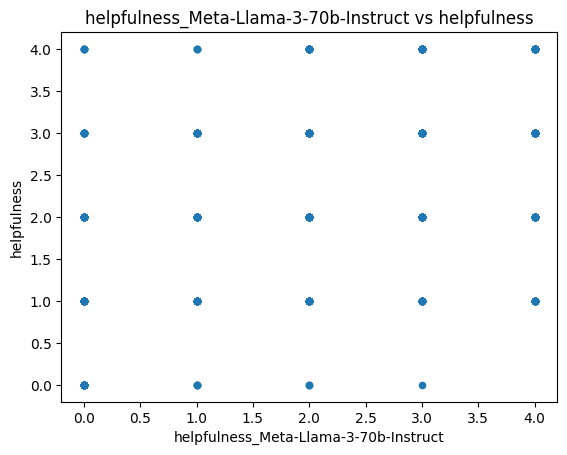

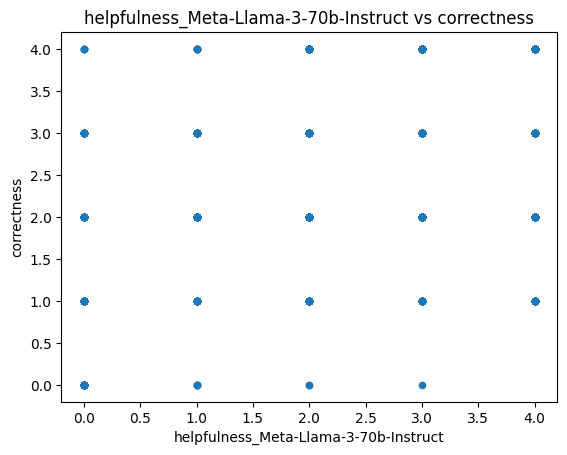

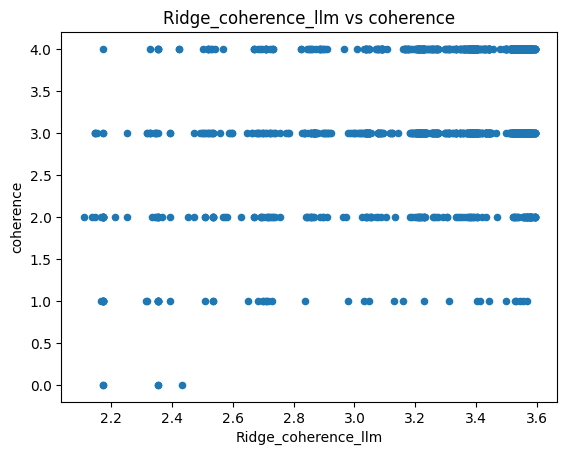

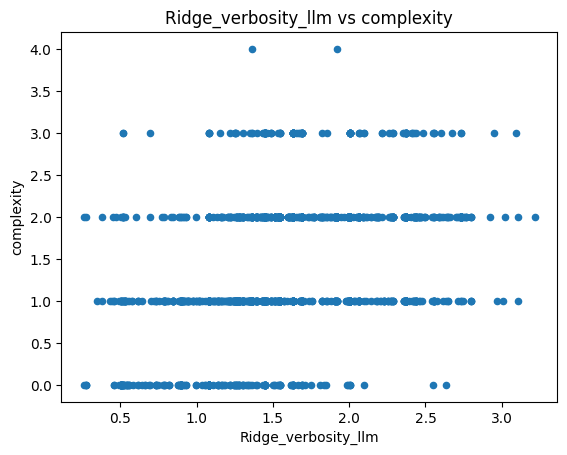

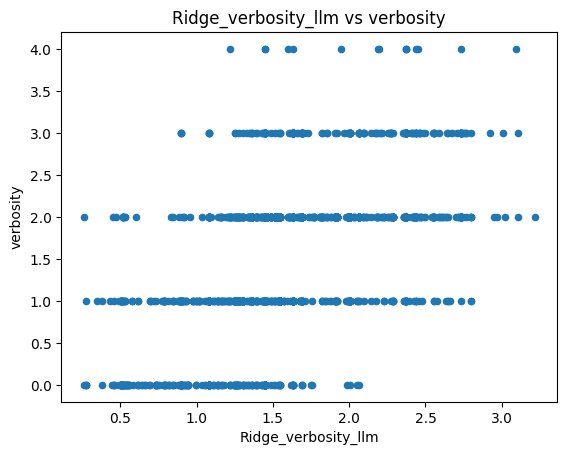

In [14]:
for target_column in dataset.target_columns:
    metric = get_top_metric_by_validation(dev, target_column, True)
    plot_metric_target_scatterplot(test, metric, target_column)
